<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/%EB%B0%A9%ED%95%99%EC%8A%A4%ED%84%B0%EB%94%94_2%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 04. 합성곱 신경망 CNN**

합성곱이란?

입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널을 사용해 입력 이미지에 대한 특성을 추출하는 방법. 합성곱 연산을 통해 추출된 이미지를 **특성맵**이라고 부른다.

이미지에 필터를 적용하는 합성곱 연산. 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영해준다. 입력 이미지와 커널이 겹치는 부분에 대해 합성곱 연산을 수행.

ex. 커널 사이즈가 3*3인 경우 총 9개의 가중치를 가지며 오차 역전파 시 커널의 가중치를 업데이트한다. 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치 때문. 오차 역전파 시 커널의 그래디언트를 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층보다 연산량 적어진다.

패딩?


커널 크기가 3*3, 스트라이드에서 1로 설정해도 추출된 특성맵의 사이즈는 입력 이미지 대배 가로로 2, 세로로 2씩 줄어들게 된다. 하지만 크기 줄어들지 않도록 패딩을 설정할 수 있다.

풀링?


풀링 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어. 연산량 감소, 과대적합 방지.

* 최대 풀링 : 값이 큰 값이 다른 특징들을 대표한다.
* 평균 풀링

최대 풀링 수행 시 커널의 크기가 2*2로 주어질 때 입력 이미지의 2*2 픽셀 중 최대값이 출력 값으로 선택. 평균 풀링은 평균 값.

풀링 레이어도 역시 스트라이드 값을 가지며 스트라이드를 2로 설정하면 2칸씩 건너뛰며 풀링을 수행.

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


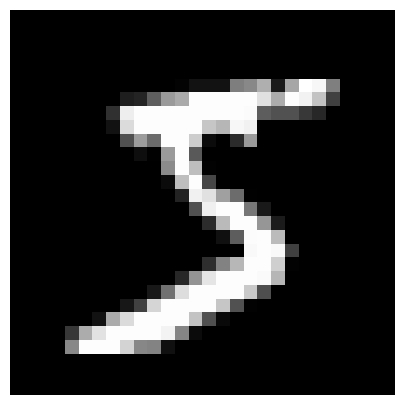

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in=x_train[..., tf.newaxis]
x_valid_in=x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델 생성해보자.

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
    #max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2121 - accuracy: 0.9399 - val_loss: 0.0856 - val_accuracy: 0.9741
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0820 - accuracy: 0.9758 - val_loss: 0.0627 - val_accuracy: 0.9801
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0622 - accuracy: 0.9817 - val_loss: 0.0542 - val_accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0522 - accuracy: 0.9844 - val_loss: 0.0651 - val_accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0438 - accuracy: 0.9870 - val_loss: 0.0593 - val_accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0540 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0584 -

In [9]:
# evaluate도 하자
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0574 - accuracy: 0.9837


[0.0574452206492424, 0.9836999773979187]

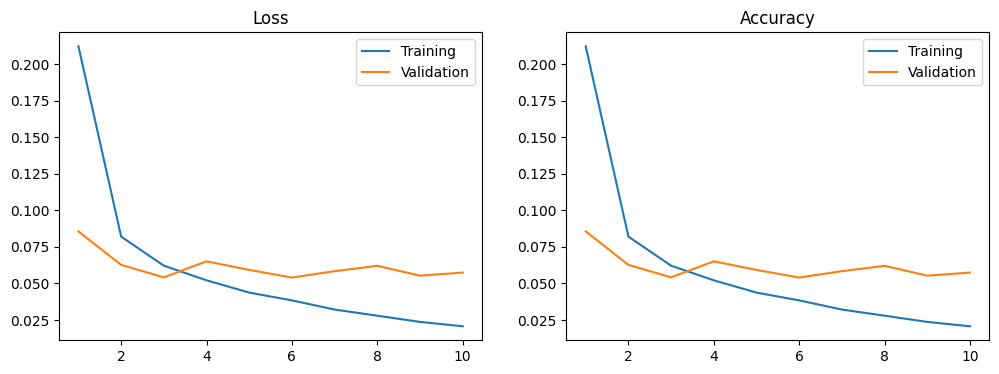

In [10]:
def plot_loss_acc(history, epoch):
  loss, val_loss=history.history['loss'], history.history['val_loss']
  acc, val_acc=history.history['accuracy'], history.history['val_accuracy']

  fig, axes=plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

4 epoch 이후로는 과대적합.

In [11]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 레이어
model.layers

In [13]:
# 첫 번재 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-8.60391036e-02,  3.16799670e-01, -8.05986881e-01,
            7.61079043e-02, -8.35393846e-01, -1.67832792e-01,
            3.41537058e-01, -1.02089047e-01,  1.30849004e-01,
           -6.07644856e-01,  2.71503180e-01, -3.24480683e-01,
           -4.90437031e-01, -2.77538896e-01,  8.50763321e-02,
           -5.31907678e-01, -5.91589391e-01,  5.06636977e-01,
            1.92718133e-01, -6.39745295e-01, -1.13295174e+00,
           -1.34113765e+00, -5.78577854e-02,  1.73387319e-01,
            4.08583403e-01, -3.13874304e-01,  4.39841837e-01,
            1.97978541e-01, -2.53547490e-01, -8.74196172e-01,
            3.20631862e-01,  1.00900382e-01]],
 
         [[ 3.83678526e-01,  2.67560929e-01,  6.27859030e-03,
            4.43584114e-01, -5.29804468e-01, -7.30223432e-02,
           -6.34290725e-02, -9.06202756e-03, -1.41964763e-01,
           -6.17814958e-01, -1.43672740e+00,  4.88619544e-02,
           

In [14]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-8.60391036e-02,  3.16799670e-01, -8.05986881e-01,
           7.61079043e-02, -8.35393846e-01, -1.67832792e-01,
           3.41537058e-01, -1.02089047e-01,  1.30849004e-01,
          -6.07644856e-01,  2.71503180e-01, -3.24480683e-01,
          -4.90437031e-01, -2.77538896e-01,  8.50763321e-02,
          -5.31907678e-01, -5.91589391e-01,  5.06636977e-01,
           1.92718133e-01, -6.39745295e-01, -1.13295174e+00,
          -1.34113765e+00, -5.78577854e-02,  1.73387319e-01,
           4.08583403e-01, -3.13874304e-01,  4.39841837e-01,
           1.97978541e-01, -2.53547490e-01, -8.74196172e-01,
           3.20631862e-01,  1.00900382e-01]],

        [[ 3.83678526e-01,  2.67560929e-01,  6.27859030e-03,
           4.43584114e-01, -5.29804468e-01, -7.30223432e-02,
          -6.34290725e-02, -9.06202756e-03, -1.41964763e-01,
          -6.17814958e-01, -1.43672740e+00,  4.88619544e-02,
           1.34391204e-01, -

In [15]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator=tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 87ms/step


2

첫번째 레이어 시각화

In [17]:
# 첫 번재 레이어 conv의 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

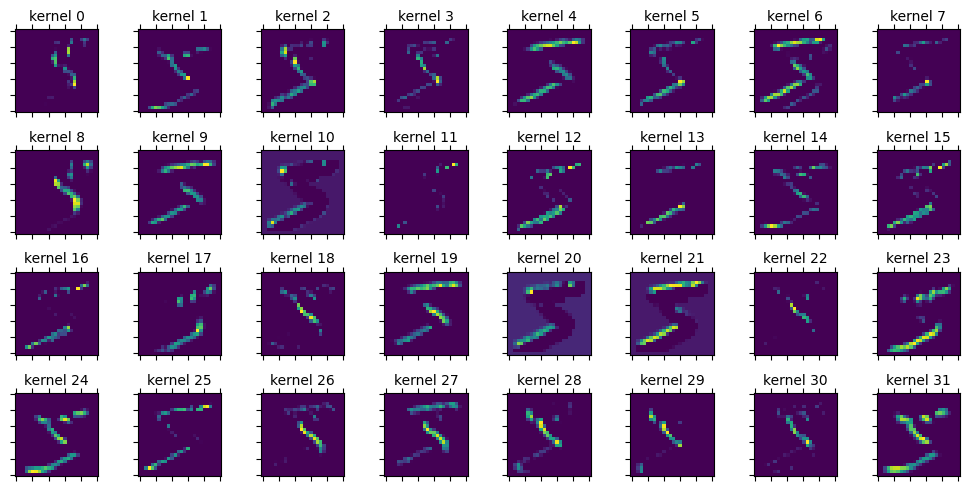

In [18]:
# Convolution 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

두번째 레이어 시각화

In [19]:
# 두번째 레이어 pool 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


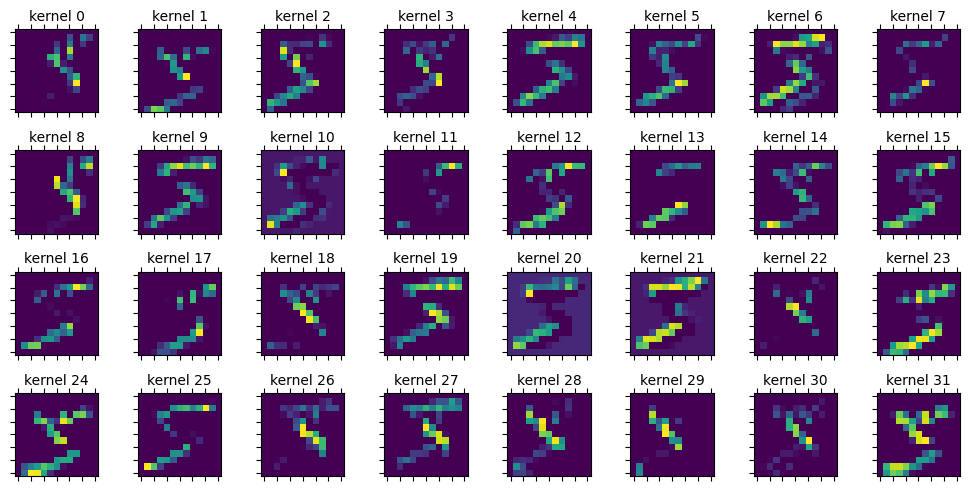

In [20]:
# 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

**복잡한 모델을 생성해보자.**

In [21]:
import tensorflow as tf
import numpy as np

#mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [22]:
# 새로운 출력 값 배열 생성 (홀수 : 1, 짝수 : 0)
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [23]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [24]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [25]:
# Functional API 를 사용하여 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1))

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

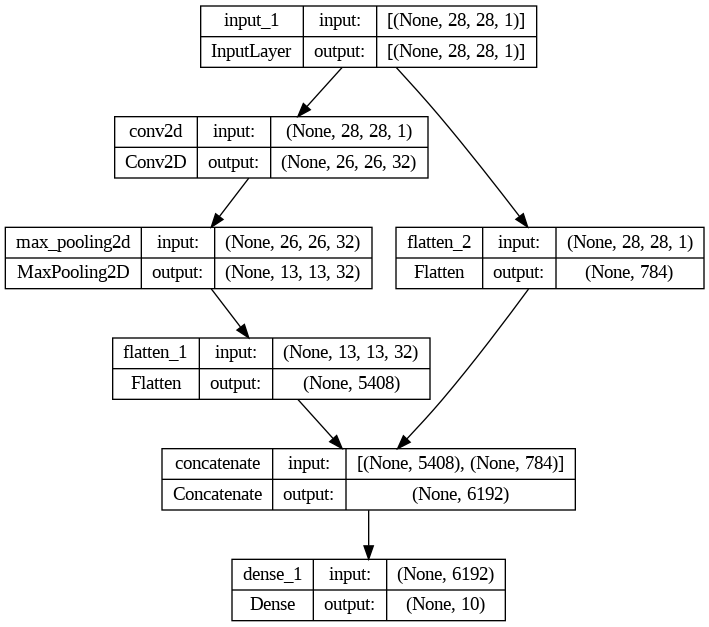

In [26]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1940 - accuracy: 0.9445 - val_loss: 0.0760 - val_accuracy: 0.9761
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0722 - accuracy: 0.9786 - val_loss: 0.0558 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0552 - accuracy: 0.9834 - val_loss: 0.0601 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0537 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0380 - accuracy: 0.9887 - val_loss: 0.0564 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0599 - val_accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0712 -

이번엔 다중 출력 분류 모델을 만들어보자.

In [ ]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history=model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3729 - digit_dense_loss: 0.2107 - odd_dense_loss: 0.3244 - digit_dense_accuracy: 0.9403 - odd_dense_accuracy: 0.8637 - val_loss: 0.2292 - val_digit_dense_loss: 0.0924 - val_odd_dense_loss: 0.2736 - val_digit_dense_accuracy: 0.9730 - val_odd_dense_accuracy: 0.8901
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2170 - digit_dense_loss: 0.0813 - odd_dense_loss: 0.2714 - digit_dense_accuracy: 0.9764 - odd_dense_accuracy: 0.8916 - val_loss: 0.2042 - val_digit_dense_loss: 0.0720 - val_odd_dense_loss: 0.2644 - val_digit_dense_accuracy: 0.9779 - val_odd_dense_accuracy: 0.8963
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1924 - digit_dense_loss: 0.0612 - odd_dense_loss: 0.2625 - digit_dense_accuracy: 0.9818 - odd_dense_accuracy: 0.8964 - val_loss: 0.1966 - val_digit_dense_loss: 0.0666 - val_odd_dense_loss: 0.2600 - val_digit_dense_accuracy: 0.9786 -

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)